In [339]:
#1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)
import pandas as pd

In [351]:
df = pd.read_csv('Batting.csv')

In [352]:
#2)	Print out the dimensions and info about the dataframe you just created
print(df.shape)
print(df.size)
df.describe()

(102816, 25)
2570400


,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [342]:
#3)	How many players have hit 40 or more HRs in one single season? (Number only)
df1=df[df['HR']>=40]
df1['playerID'].nunique()

142

In [349]:
# 4)	How many players have hit 600 or more HRs for their career? 
# (Dataframe with name and player first and last name only and amount of HRs)
df1=df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()
df1=df1[df1['HR']>=600]
df2=df1['playerID'].nunique()
print(df2)
print(df1[['nameFirst','nameLast','HR']])

8
      nameFirst   nameLast   HR
1          Hank      Aaron  755
1542      Barry      Bonds  762
6633        Ken    Griffey  630
10857    Willie       Mays  660
14528      Alex  Rodriguez  696
14865      Babe       Ruth  714
16103     Sammy       Sosa  609
17004       Jim      Thome  612


In [350]:
# 5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, 
# and 30 HRs or more in one season? (Number Only)
df[(df['3B'] >= 10) & (df['2B'] >= 40) & (df['H'] >=200) & (df['HR'] >=30) ].nunique()['playerID']

11

In [7]:
# 6)	How many players seasons have had 100 or more SBs? 
# (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
df1=df.groupby(['nameFirst','nameLast','yearID'], as_index = False)[['SB']].sum()
df1=df1[df1['SB']>=100]
df1.sort_values('SB',ascending = [False])

,nameFirst,nameLast,yearID,SB
42091,Hugh,Nicol,1887,138.0
78136,Rickey,Henderson,1982,130.0
3566,Arlie,Latham,1887,129.0
62189,Lou,Brock,1974,118.0
15908,Charlie,Comiskey,1887,117.0
7766,Billy,Hamilton,1891,111.0
54252,John,Ward,1887,111.0
7764,Billy,Hamilton,1889,111.0
92044,Vince,Coleman,1985,110.0
3567,Arlie,Latham,1888,109.0


In [8]:
# 7)	How many players in the 1960s (yearID) have hit 200 or more HRs? 
# (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
df1= df[(df['yearID']>=1960) & (df['yearID']<=1969)]
df2=df1.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()
df3=df2[df2['HR']>=200]
df3.sort_values('HR',ascending = [False])

,playerID,nameFirst,nameLast,HR
856,killeha01,Harmon,Killebrew,393
0,aaronha01,Hank,Aaron,375
1044,mayswi01,Willie,Mays,350
1372,robinfr02,Frank,Robinson,316
1057,mccovwi01,Willie,McCovey,300
751,howarfr01,Frank,Howard,288
279,cashno01,Norm,Cash,278
70,bankser01,Ernie,Banks,269
1009,mantlmi01,Mickey,Mantle,256
283,cepedor01,Orlando,Cepeda,254


In [353]:
#8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
df1=df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['HR']].sum()
df1[['nameFirst','nameLast','HR']].nlargest(1,columns='HR')

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


In [354]:
#9)	Who had the most hits (H) in the 1970s? (Dataframe)
df1=df[(df['yearID']>=1970) & (df['yearID']<=1979)]
df2=df1.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['H']].sum()
df2[['playerID','nameFirst','nameLast','H']].nlargest(1,columns='H')

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


In [355]:
# 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
# (Dataframe, first name, last name, OBP, ordered descending by OBP)
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False).sum()
df1['OBP']=(df1['H']+df1['BB']+df1['HBP'])/(df1['AB']+df1['BB']+df1['HBP']+df['SF'])
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SH']+df1['SF']
df1['BA']=df1['H']/df1['AB']
df_res=df1

In [356]:
df2=df1[(df1['PA'] >=500)&(df1['yearID']==1977)]

In [358]:
df2[['nameFirst','nameLast','OBP']].sort_values('OBP',ascending = [False]).head(5)

,nameFirst,nameLast,OBP
50637,Rod,Carew,0.452035
51247,Ken,Singleton,0.441176
51254,Reggie,Smith,0.431933
50836,Mike,Hargrove,0.424290
51082,Joe,Morgan,0.418351


In [360]:
#11)	Top 8 highest averages in 2013 with at least 300 PAs? 
#(Dataframe, first name, last name, average, descending by average)
df1=df_res[(df_res['yearID']==2013)]
df1= df1[(df1['PA']>=300)]
df1[['nameFirst','nameLast','BA']].nlargest(8,columns='BA')

,nameFirst,nameLast,BA
90092,Miguel,Cabrera,0.347748
90905,Hanley,Ramirez,0.345395
90194,Michael,Cuddyer,0.331288
90684,Joe,Mauer,0.323596
91121,Mike,Trout,0.322581
90520,Chris,Johnson,0.321012
90323,Freddie,Freeman,0.319419
90887,Yasiel,Puig,0.319372


In [ ]:
#12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

In [361]:
df1=df.groupby(['playerID','yearID','nameFirst','nameLast'], as_index = False)[['H']].sum()
df1
df2=df1[(df1['yearID']>=1940) & (df1['yearID']<=1949)]
df2
df3=df2.sort_values('H' , ascending=[False])
df3[['nameFirst','nameLast','H']].head(10)


,nameFirst,nameLast,H
61223,Stan,Musial,230
61221,Stan,Musial,228
39285,Tommy,Holmes,224
61219,Stan,Musial,220
86576,Cecil,Travis,218
67188,Johnny,Pesky,208
21769,Bob,Dillinger,207
88365,Mickey,Vernon,207
67189,Johnny,Pesky,207
61224,Stan,Musial,207


In [374]:
#13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)
df1=df.groupby(['playerID','yearID','nameFirst','nameLast'], as_index = False)[['H']].sum()
df2=df1.sort_values('H', ascending=[False])
print(df2[['playerID','nameFirst','nameLast','H']].head())
print("Number of Times :")
df2[(df2['playerID']=='suzukic01')].count()['playerID']

        playerID nameFirst nameLast    H
83727  suzukic01    Ichiro   Suzuki  262
79328  sislege01    George   Sisler  257
63468  odoulle01     Lefty   O'Doul  254
84963  terrybi01      Bill    Terry  254
79023  simmoal01        Al  Simmons  253
Number of Times :


16

In [317]:
#14)	 Which players have played the most games for their careers?  
#Top 5 first name, last name, descending by games played presented as a dataframe
df1=df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['G']].sum()
df2=df1.sort_values('G' , ascending=[False])
df2[['nameFirst','nameLast','G']].head(5)

,nameFirst,nameLast,G
603,Adam,Jones,162
196,Starlin,Castro,162
1138,Ichiro,Suzuki,162
369,Prince,Fielder,162
148,Billy,Butler,161


In [105]:
#15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  
#Just a number is okay here
df1=df.groupby(['playerID','nameFirst','nameLast'], as_index = False)[['H','HR']].sum()
df1[(df1['H']>=3000) & (df1['HR'] >=500)].count()['playerID']


5

In [109]:
#16)How many HRs were hit during the entire 1988 season?  Just a number is okay here
df1=df.groupby(['playerID','yearID'], as_index = False)[['HR']].sum()
df2=df1[(df1['yearID']==1988)]
df2['HR'].sum()
#df2=df1[(df1['yearID']>=1940) & (df1['yearID']<=1949)]

3180

In [314]:
#17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in 
#which he had at least 500 or more ABs.  
#Dataframe, first name, last name, average, descending by average
df_res
df1=df_res[(df_res['nameFirst']=='Wade') & (df_res['nameLast']=='Boggs')]
df1
df1=df1[(df1['AB']>=500)]
df1[['nameFirst','nameLast','BA']].nlargest(3,columns='BA')


,nameFirst,nameLast,BA
58267,Wade,Boggs,0.367534
61237,Wade,Boggs,0.366438
60219,Wade,Boggs,0.362976


In [376]:
#18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  
#Dataframe with first name, last name, OBP
df_res
df1=df_res.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False)[['OBP','PA']].sum()
df1
df2=df1[(df1['yearID']==1995)]
df3=df2[(df2['PA']>=400)]
df3[['nameFirst','nameLast','OBP']].nlargest(10,columns='OBP')

,nameFirst,nameLast,OBP
68474,Edgar,Martinez,0.477379
68848,Frank,Thomas,0.462992
68505,Mark,McGwire,0.447115
68081,Chili,Davis,0.436647
68851,Jim,Thome,0.436494
67953,Barry,Bonds,0.434231
68740,Tim,Salmon,0.432177
68458,Dave,Magadan,0.429594
68398,Chuck,Knoblauch,0.424483
67950,Wade,Boggs,0.417603


In [378]:
#19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, 
#last name, number of 3Bs
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False)[['3B']].sum()
df_total=df1[(df1['yearID']==1922) | (df1['yearID']==1925) | (df1['yearID']==1926) | (df1['yearID']==1928)]
df_total.groupby(['playerID','nameFirst','nameLast'],as_index=False).sum().nlargest(1,columns='3B')[['nameFirst','nameLast','3B']]


,nameFirst,nameLast,3B
1011,Curt,Walker,59


In [193]:
#20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  
#A number is okay here
df1=df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False)[['HR','SB']].sum()
df2=df1[(df1['HR']>=30) & (df1['SB']>=30)]
df2['playerID'].nunique()

38

In [200]:
#21-Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)
df_res
df1=df_res.groupby(['yearID','playerID','nameFirst','nameLast'], as_index = False)[['OBP','AB']].sum()
df1
df2=df1[(df1['yearID']==1986)]
df3=df2[(df2['AB']>=400)]
df3.nlargest(1,columns='OBP')[['nameFirst','nameLast','OBP']]

,nameFirst,nameLast,OBP
58869,Wade,Boggs,0.455474


In [379]:
#22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
df_nl=df.groupby(['yearID','playerID','nameFirst','nameLast','lgID'] , as_index = False).sum()
df_nl['OBP']=(df_nl['H']+df_nl['BB']+df_nl['HBP'])/(df_nl['AB']+df_nl['BB']+df_nl['HBP']+df_nl['SF'])
df_nl['PA']=df_nl['AB']+df_nl['BB']+df_nl['HBP']+df_nl['SH']+df_nl['SF']
df_nl['BA']=df_nl['H']/df_nl['AB']
df_res=df_nl
df_res
#df_res.info()
#df1=df_res.groupby(['yearID','playerID','nameFirst','nameLast','lgID'], as_index = False)[['OBP','AB']].sum()
df1 = df_res[(df_res['yearID']==1997)&(df_res['AB']>=400)&(df_res['lgID']=='NL')]
df1.nlargest(1,columns='OBP')[['nameFirst','nameLast','OBP']]
# df2=df1[(df1['yearID']==1997) & (df2['lgID']=='NL')]
# df3=df2[(df2['AB']>='400')]
# df3.nlargest(1,columns='OBP')[['nameFirst','nameLast','OBP']]


,nameFirst,nameLast,OBP
71973,Larry,Walker,0.451807


In [309]:
#23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012
#(filter out all players with less 500 ABs)? 
#(Dataframe first name, last name, HR descending)

#mean_HR = df_nl['HR'].mean()
df = df_nl[df_nl['yearID']== 2012]
df1 = df.groupby(['lgID','playerID', 'nameFirst', 'nameLast'], as_index= False).sum()
df_AL=df1[(df1['lgID']=='AL')]
df_NL=df1[(df1['lgID']=='NL')]
mean_HR_AL=df_AL['HR'].mean()
print(mean_HR_AL)
mean_HR_NL=df_NL['HR'].mean()
print(mean_HR_NL)
print("AL-American League")
df_AL_1=df_AL[(df_AL['HR'] > mean_HR_AL) & (df_AL['AB']>= 500)].sort_values(by= ['HR', 'AB'], ascending = [False, False])
print(df_AL_1[['nameFirst', 'nameLast', 'HR']].reset_index())
print("NL-National League")
df_NL_1=df_NL[(df_NL['HR'] > mean_HR_NL) & (df_NL['AB']>= 500)].sort_values(by= ['HR', 'AB'], ascending = [False, False])
print(df_AL_1[['nameFirst', 'nameLast', 'HR']].reset_index())


3.9872408293460926
3.361878453038674
AL-American League
    index  nameFirst     nameLast  HR
0      72     Miguel      Cabrera  44
1     219     Curtis   Granderson  43
2     231       Josh     Hamilton  43
3     167      Edwin  Encarnacion  42
4     162       Adam         Dunn  41
5      43     Adrian       Beltre  36
6     616       Josh   Willingham  35
7      76   Robinson         Cano  33
8     133      Chris        Davis  33
9     294       Adam        Jones  32
10    482       Josh      Reddick  32
11    584       Mark       Trumbo  32
12    467     Albert       Pujols  30
13    179     Prince      Fielder  30
14    583       Mike        Trout  30
15     69      Billy       Butler  29
16    587     Melvin        Upton  28
17    311       Paul      Konerko  26
18    491       Alex         Rios  25
19    596      Dayan      Viciedo  25
20    127     Nelson         Cruz  24
21    562       Nick      Swisher  24
22    480      Colby       Rasmus  23
23    612       Matt      Wieter

In [380]:
#24	 Who is the youngest player to hit 50 or more HRs in a single season? 
#(Dataframe, first name, last name, HRs, season)
df_nl['player_age'] = df_nl['yearID']- df_nl['birthYear'] 
df1 = df_nl.groupby(['yearID','playerID', 'nameFirst', 'nameLast'], as_index= False).sum()
df2 = df1[(df1['HR']>= 50)].sort_values(by= 'player_age')
df2[['nameFirst', 'nameLast', 'HR', 'yearID']].head(1)

,nameFirst,nameLast,HR,yearID
81931,Prince,Fielder,50,2007


In [290]:
#25	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 
#300 HRs)
df1 = df_nl.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index= False).agg({'HR' : 'sum', 'player_age': 'first'}).sort_values(by='yearID')
df1['cumulative_HR'] = df1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index= False)['HR'].cumsum()
df2 = df1[(df1['cumulative_HR']>=300)&(df1['player_age']>0)].sort_values(by='player_age')
df3 = df2.groupby(['playerID', 'nameFirst', 'nameLast'], as_index= False).agg({'player_age': 'first', 'cumulative_HR': 'first', 'yearID': 'first'}).sort_values(by=['player_age', 'cumulative_HR'], ascending=[True, False])
df3.reset_index().head(5)

,index,playerID,nameFirst,nameLast,player_age,cumulative_HR,yearID
0,111,rodrial01,Alex,Rodriguez,28,345,2003
1,105,pujolal01,Albert,Pujols,28,319,2008
2,98,ottme01,Mel,Ott,28,306,1937
3,46,foxxji01,Jimmie,Foxx,28,302,1935
4,69,jonesan01,Andruw,Jones,28,301,2005


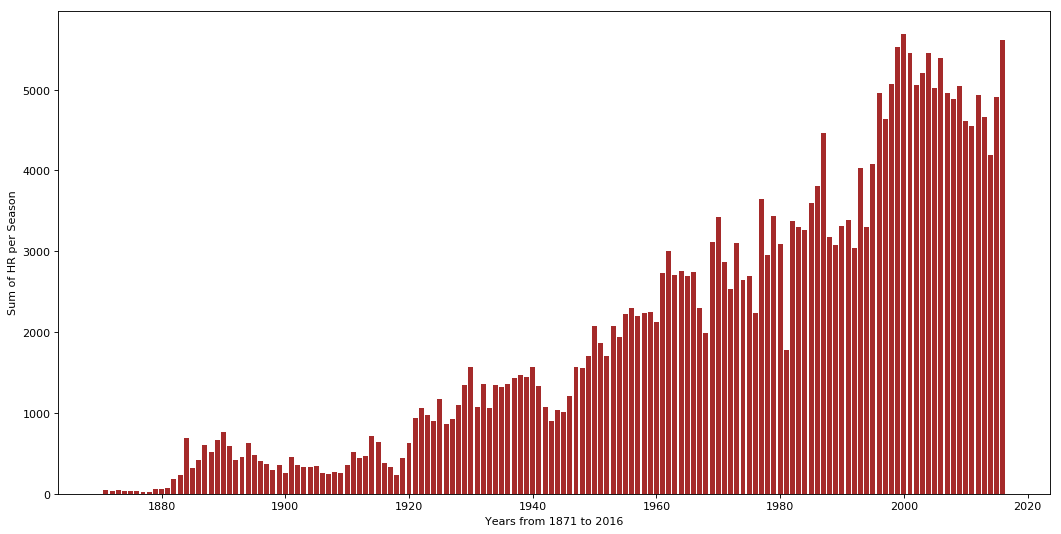

In [307]:
#Graph total HRs per season using bar graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_x = df.groupby(['yearID'], as_index= False).sum()
df_y = df_x[['yearID', 'HR']] 
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='b')
plt.bar(df_y['yearID'], df_y['HR'], align = 'center',color='brown')
plt.xlabel('Years from 1871 to 2016')
plt.ylabel('Sum of HR per Season')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


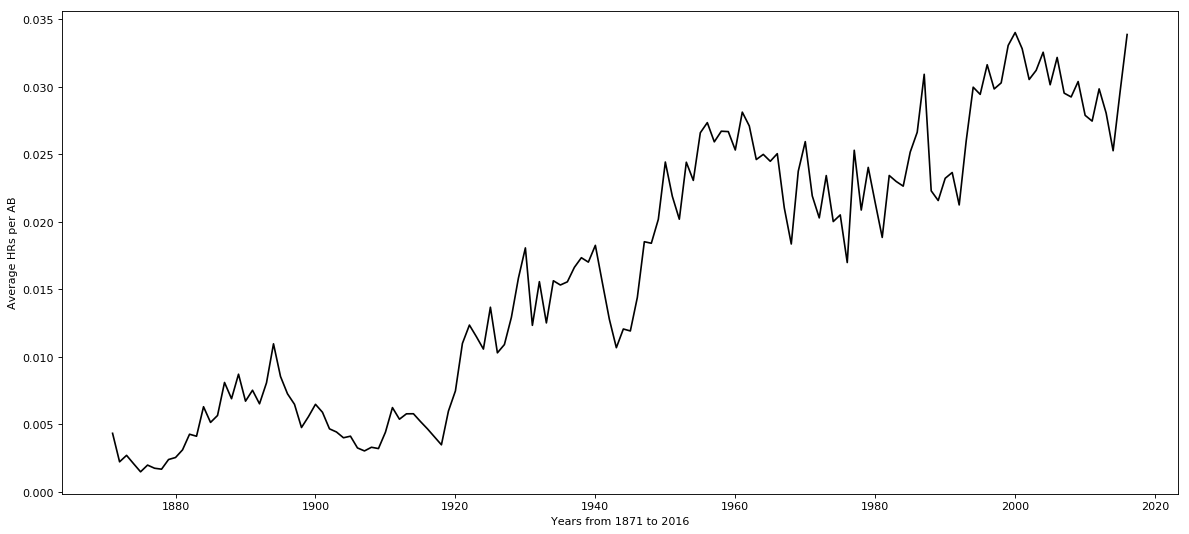

In [308]:
#Using a line graph please graph the average HRs per AB (think about this) per season
df_x = df.groupby(['yearID'], as_index= False).sum()
df_y = df_x[['yearID', 'HR', 'AB']]
df_y['HR/AB'] = df_y['HR']/df_y['AB']
df_y

plt.figure(figsize=(18,8), dpi=80, facecolor='w', edgecolor='r')
#plt.bar(df_y['yearID'], df_y['HR/AB'], align = 'center', color='black')
plt.plot(df_y['yearID'], df_y['HR/AB'],color='black')
plt.xlabel('Years from 1871 to 2016')
plt.ylabel('Average HRs per AB')
plt.show()
